In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [3]:
features = pd.read_csv('/Users/simonlipson/Downloads/aflstats/stats.csv')

In [4]:
features.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,Adelaide,"Atkins, Rory",1994-07-12,186,85,Midfield,2018,R1,2018-03-23,87.0,...,0,0,4,9,0,0,0,0,1,86
1,Adelaide,"Betts, Eddie",1986-11-26,174,74,Forward,2018,R1,2018-03-23,87.0,...,0,0,6,9,0,1,3,0,1,85
2,Adelaide,"Brown, Luke",1992-09-22,181,81,Defender,2018,R1,2018-03-23,87.0,...,0,0,1,10,0,0,2,0,0,82
3,Adelaide,"Crouch, Matt",1995-04-21,182,80,Midfield,2018,R1,2018-03-23,87.0,...,1,0,11,31,0,0,0,0,1,80
4,Adelaide,"Doedee, Tom",1997-03-01,188,88,Defender,2018,R1,2018-03-23,87.0,...,0,0,8,14,0,0,9,1,0,93


In [5]:
features.shape

(63712, 37)

In [6]:
features.columns

Index(['Team', 'Player', 'D.O.B', 'Height', 'Weight', 'Position', 'Season',
       'Round', 'Date', 'Score', 'Margin', 'WinLoss', 'Opposition', 'Venue',
       'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals', 'Behinds',
       'Hitouts', 'Tackles', 'Rebound50s', 'Inside50s', 'Clearances',
       'Clangers', 'FreesFor', 'FreesAgainst', 'BrownlowVotes',
       'ContendedPossessions', 'UncontendedPossessions', 'ContestedMarks',
       'MarksInside50', 'OnePercenters', 'Bounces', 'GoalAssists',
       'PercentPlayed'],
      dtype='object')

In [7]:
features['new_index'] = features['Season'].astype(str) + features['Team'] + features['Round']

In [8]:
features.groupby('new_index').count()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
new_index,,,,,,,,,,,,,,,,,,,,,
2012AdelaidePF,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2012AdelaideQF,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2012AdelaideR1,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2012AdelaideR10,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2012AdelaideR12,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018Western BulldogsR5,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2018Western BulldogsR6,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2018Western BulldogsR7,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [9]:
features = features.groupby('new_index').agg(
win_loss = pd.NamedAgg(column = 'WinLoss', aggfunc = 'max'),
margin = pd.NamedAgg(column = 'Margin', aggfunc = 'max'),
disposals = pd.NamedAgg(column = 'Disposals', aggfunc = 'sum'),
kicks = pd.NamedAgg(column = 'Kicks', aggfunc = 'sum'),
marks = pd.NamedAgg(column = 'Marks', aggfunc = 'sum'),
handballs = pd.NamedAgg(column = 'Handballs', aggfunc = 'sum'),
hitouts = pd.NamedAgg(column = 'Hitouts', aggfunc = 'sum'),
tackles = pd.NamedAgg(column = 'Tackles', aggfunc = 'sum'),
rebound50s = pd.NamedAgg(column = 'Rebound50s', aggfunc = 'sum'),
inside50s = pd.NamedAgg(column = 'Inside50s', aggfunc = 'sum'),
clearances = pd.NamedAgg(column = 'Clearances', aggfunc = 'sum'),
clangers = pd.NamedAgg(column = 'Clangers', aggfunc = 'sum'),
freesfor = pd.NamedAgg(column = 'FreesFor', aggfunc = 'sum'),
freesagainst = pd.NamedAgg(column = 'FreesAgainst', aggfunc = 'sum'),
contendedpossessions = pd.NamedAgg(column = 'ContendedPossessions', aggfunc = 'sum'),
uncontendedpossessions = pd.NamedAgg(column = 'UncontendedPossessions', aggfunc = 'sum'),
contestedmarks = pd.NamedAgg(column = 'ContestedMarks', aggfunc = 'sum'),
marksinside50 = pd.NamedAgg(column = 'MarksInside50', aggfunc = 'sum'),
oncepercenters = pd.NamedAgg(column = 'OnePercenters', aggfunc = 'sum'),
bounces = pd.NamedAgg(column = 'Bounces', aggfunc = 'sum')
)

In [10]:
features.isnull().sum()

win_loss                  4
margin                    4
disposals                 0
kicks                     0
marks                     0
handballs                 0
hitouts                   0
tackles                   0
rebound50s                0
inside50s                 0
clearances                0
clangers                  0
freesfor                  0
freesagainst              0
contendedpossessions      0
uncontendedpossessions    0
contestedmarks            0
marksinside50             0
oncepercenters            0
bounces                   0
dtype: int64

In [11]:
features.dropna(inplace=True)

In [12]:
features.shape

(2892, 20)

In [13]:
features.head()

,win_loss,margin,disposals,kicks,marks,handballs,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,oncepercenters,bounces
new_index,,,,,,,,,,,,,,,,,,,,
2012AdelaidePF,L,-5.0,363,213,115,150,45,39,47,38,33,52,22,24,126,241,15,12,47,18
2012AdelaideQF,L,-29.0,334,201,79,133,42,50,26,59,33,50,23,17,146,185,11,6,55,17
2012AdelaideR1,W,69.0,406,252,109,154,42,73,28,73,39,47,15,16,152,249,10,16,42,1
2012AdelaideR10,W,29.0,351,215,85,136,34,58,29,48,52,41,20,14,155,201,11,12,57,4
2012AdelaideR12,W,4.0,373,224,87,149,63,59,35,56,36,46,16,16,166,207,13,15,39,9


In [14]:
X_test = features.filter(regex='2018', axis=0).iloc[:,2:20]

In [15]:
X_train = features.filter(regex='2012|2013|2014|2015|2016|2017', axis=0).iloc[:,2:20]

In [16]:
y_test = features.filter(regex='2018', axis=0).iloc[:,0]

In [17]:
y_train = features.filter(regex='2012|2013|2014|2015|2016|2017', axis=0).iloc[:,0]

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.791310 (0.028388)
LDA: 0.811049 (0.024933)
KNN: 0.729256 (0.023844)
CART: 0.695791 (0.032177)
NB: 0.765512 (0.018004)
SVM: 0.496779 (0.002875)


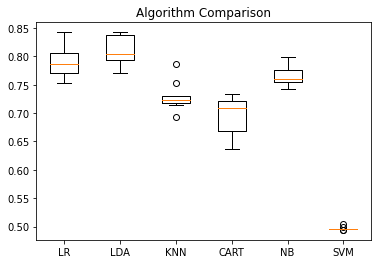

In [19]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [20]:
model = LinearDiscriminantAnalysis()
model.fit(X_test, y_test)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [21]:
y_pred = model.predict(X_test)

In [22]:
result = pd.DataFrame({'actual': y_test,
                      'prediction': y_pred})

In [23]:
result

,actual,prediction
new_index,,
2018AdelaideR1,L,L
2018AdelaideR10,L,L
2018AdelaideR11,L,W
2018AdelaideR12,L,L
2018AdelaideR13,L,L
...,...,...
2018Western BulldogsR5,L,L
2018Western BulldogsR6,W,W
2018Western BulldogsR7,W,W


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           D       1.00      1.00      1.00         2
           L       0.85      0.86      0.86       204
           W       0.86      0.85      0.85       204

    accuracy                           0.86       410
   macro avg       0.90      0.90      0.90       410
weighted avg       0.86      0.86      0.86       410



disposals, Score: -0.21627125757586013
kicks, Score: -0.1162791403092036
marks, Score: -0.1760409508143753
handballs, Score: -0.2402850761128651
hitouts, Score: 0.01990706112697647
tackles, Score: 0.033681621035328374
rebound50s, Score: 0.39174523964003455
inside50s, Score: 0.23147814163365354
clearances, Score: -0.19789116056177475
clangers, Score: -0.31579277030129377
freesfor, Score: -0.07105508393824286
freesagainst, Score: 0.17014440429096134
contendedpossessions, Score: 0.3822900809886051
uncontendedpossessions, Score: 0.44860920688739203
contestedmarks, Score: -0.4109104364133975
marksinside50, Score: 0.0938204629057515
oncepercenters, Score: 0.03189118372867834
bounces, Score: 0.07460037979127959


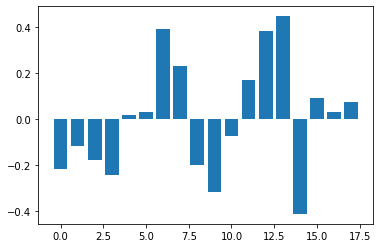

In [27]:
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('{}, Score: {}'.format(X_train.columns[i],v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [28]:
y_test1 = features.filter(regex='2018', axis=0).iloc[:,1]

In [29]:
y_train1 = features.filter(regex='2012|2013|2014|2015|2016|2017', axis=0).iloc[:,1]

In [30]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train1, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


LR: 0.669927 (0.020176)
LASSO: 0.669910 (0.020544)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.8781849101651, tolerance: 483.52964245409765
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11751.007929322543, tolerance: 483.02809896999565
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1482.920661780052, tolerance: 485.4459735004477
  model = cd_fast.enet_coordinate_descent(


EN: 0.669843 (0.020241)
KNN: 0.493817 (0.034722)
CART: 0.241641 (0.049348)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GBM: 0.657590 (0.027596)


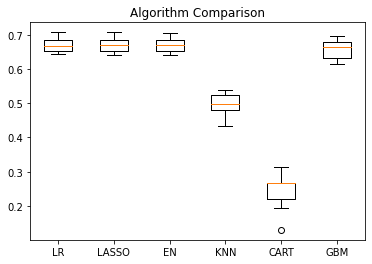

In [31]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [32]:
model = LinearRegression()
model.fit(X_test, y_test1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = model.predict(X_test)

In [34]:
result2 = pd.DataFrame({'actual1': y_test1,
                      'prediction1': y_pred})

In [35]:
result2

,actual1,prediction1
new_index,,
2018AdelaideR1,-12.0,-11.946186
2018AdelaideR10,-91.0,-53.316523
2018AdelaideR11,-16.0,14.761262
2018AdelaideR12,-3.0,-14.882648
2018AdelaideR13,-56.0,-54.202132
...,...,...
2018Western BulldogsR5,-54.0,-52.662983
2018Western BulldogsR6,21.0,8.763220
2018Western BulldogsR7,9.0,38.249044


In [36]:
merged_results = pd.merge(result, result2, left_index=True, right_index=True)

In [37]:
merged_results

,actual,prediction,actual1,prediction1
new_index,,,,
2018AdelaideR1,L,L,-12.0,-11.946186
2018AdelaideR10,L,L,-91.0,-53.316523
2018AdelaideR11,L,W,-16.0,14.761262
2018AdelaideR12,L,L,-3.0,-14.882648
2018AdelaideR13,L,L,-56.0,-54.202132
...,...,...,...,...
2018Western BulldogsR5,L,L,-54.0,-52.662983
2018Western BulldogsR6,W,W,21.0,8.763220
2018Western BulldogsR7,W,W,9.0,38.249044


In [38]:
merged_results['delta'] = abs(merged_results['actual1']) - abs(merged_results['prediction1'])

In [39]:
merged_results

,actual,prediction,actual1,prediction1,delta
new_index,,,,,
2018AdelaideR1,L,L,-12.0,-11.946186,0.053814
2018AdelaideR10,L,L,-91.0,-53.316523,37.683477
2018AdelaideR11,L,W,-16.0,14.761262,1.238738
2018AdelaideR12,L,L,-3.0,-14.882648,-11.882648
2018AdelaideR13,L,L,-56.0,-54.202132,1.797868
...,...,...,...,...,...
2018Western BulldogsR5,L,L,-54.0,-52.662983,1.337017
2018Western BulldogsR6,W,W,21.0,8.763220,12.236780
2018Western BulldogsR7,W,W,9.0,38.249044,-29.249044


In [40]:
merged_results['delta'].mean()

5.707401996947569

In [41]:
print(metrics.mean_squared_error(y_test1, y_pred))
print(metrics.r2_score(y_test1, y_pred))

582.6778059098233
0.6683502878908232


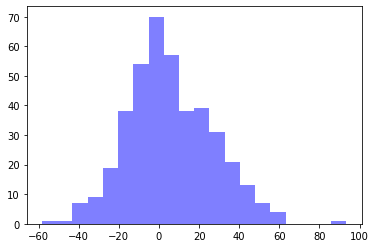

In [42]:
num_bins = 20
n, bins, patches = pyplot.hist(merged_results['delta'], num_bins, facecolor='blue', alpha=0.5)
pyplot.show()